# What is Diabetes?

Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

# About this project :-

>The objective of this project is to classify whether someone has diabetes or not.

>Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)

>The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'

>The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

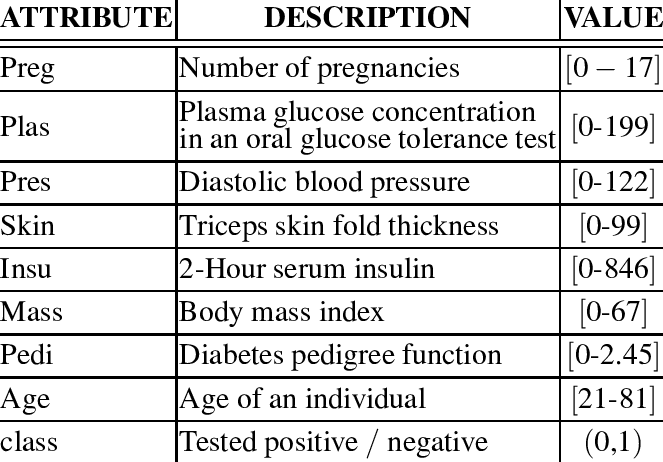

# Import the required Libraries

In [1]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import all the required library for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Loading the Datasets

In [2]:
#load the dataset
data = pd.read_csv("diabetes.csv")

In [3]:
#print the 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#check the dataset shape
data.shape

(768, 9)

In [5]:
#check the dataset datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#check the null value in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#check the describe of datafame
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Drop the duplicates values
data = data.drop_duplicates()

# Data Visualization

0    500
1    268
Name: Outcome, dtype: int64

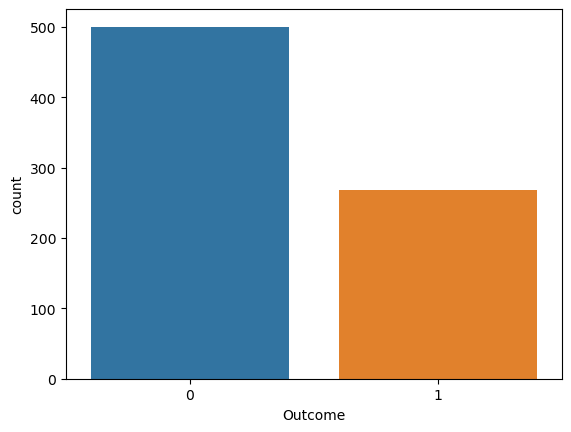

In [9]:
#check the data is balanced or not
sns.countplot(x = "Outcome", data = data)

data.Outcome.value_counts()

Conclusion :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

<AxesSubplot:xlabel='Age', ylabel='Density'>

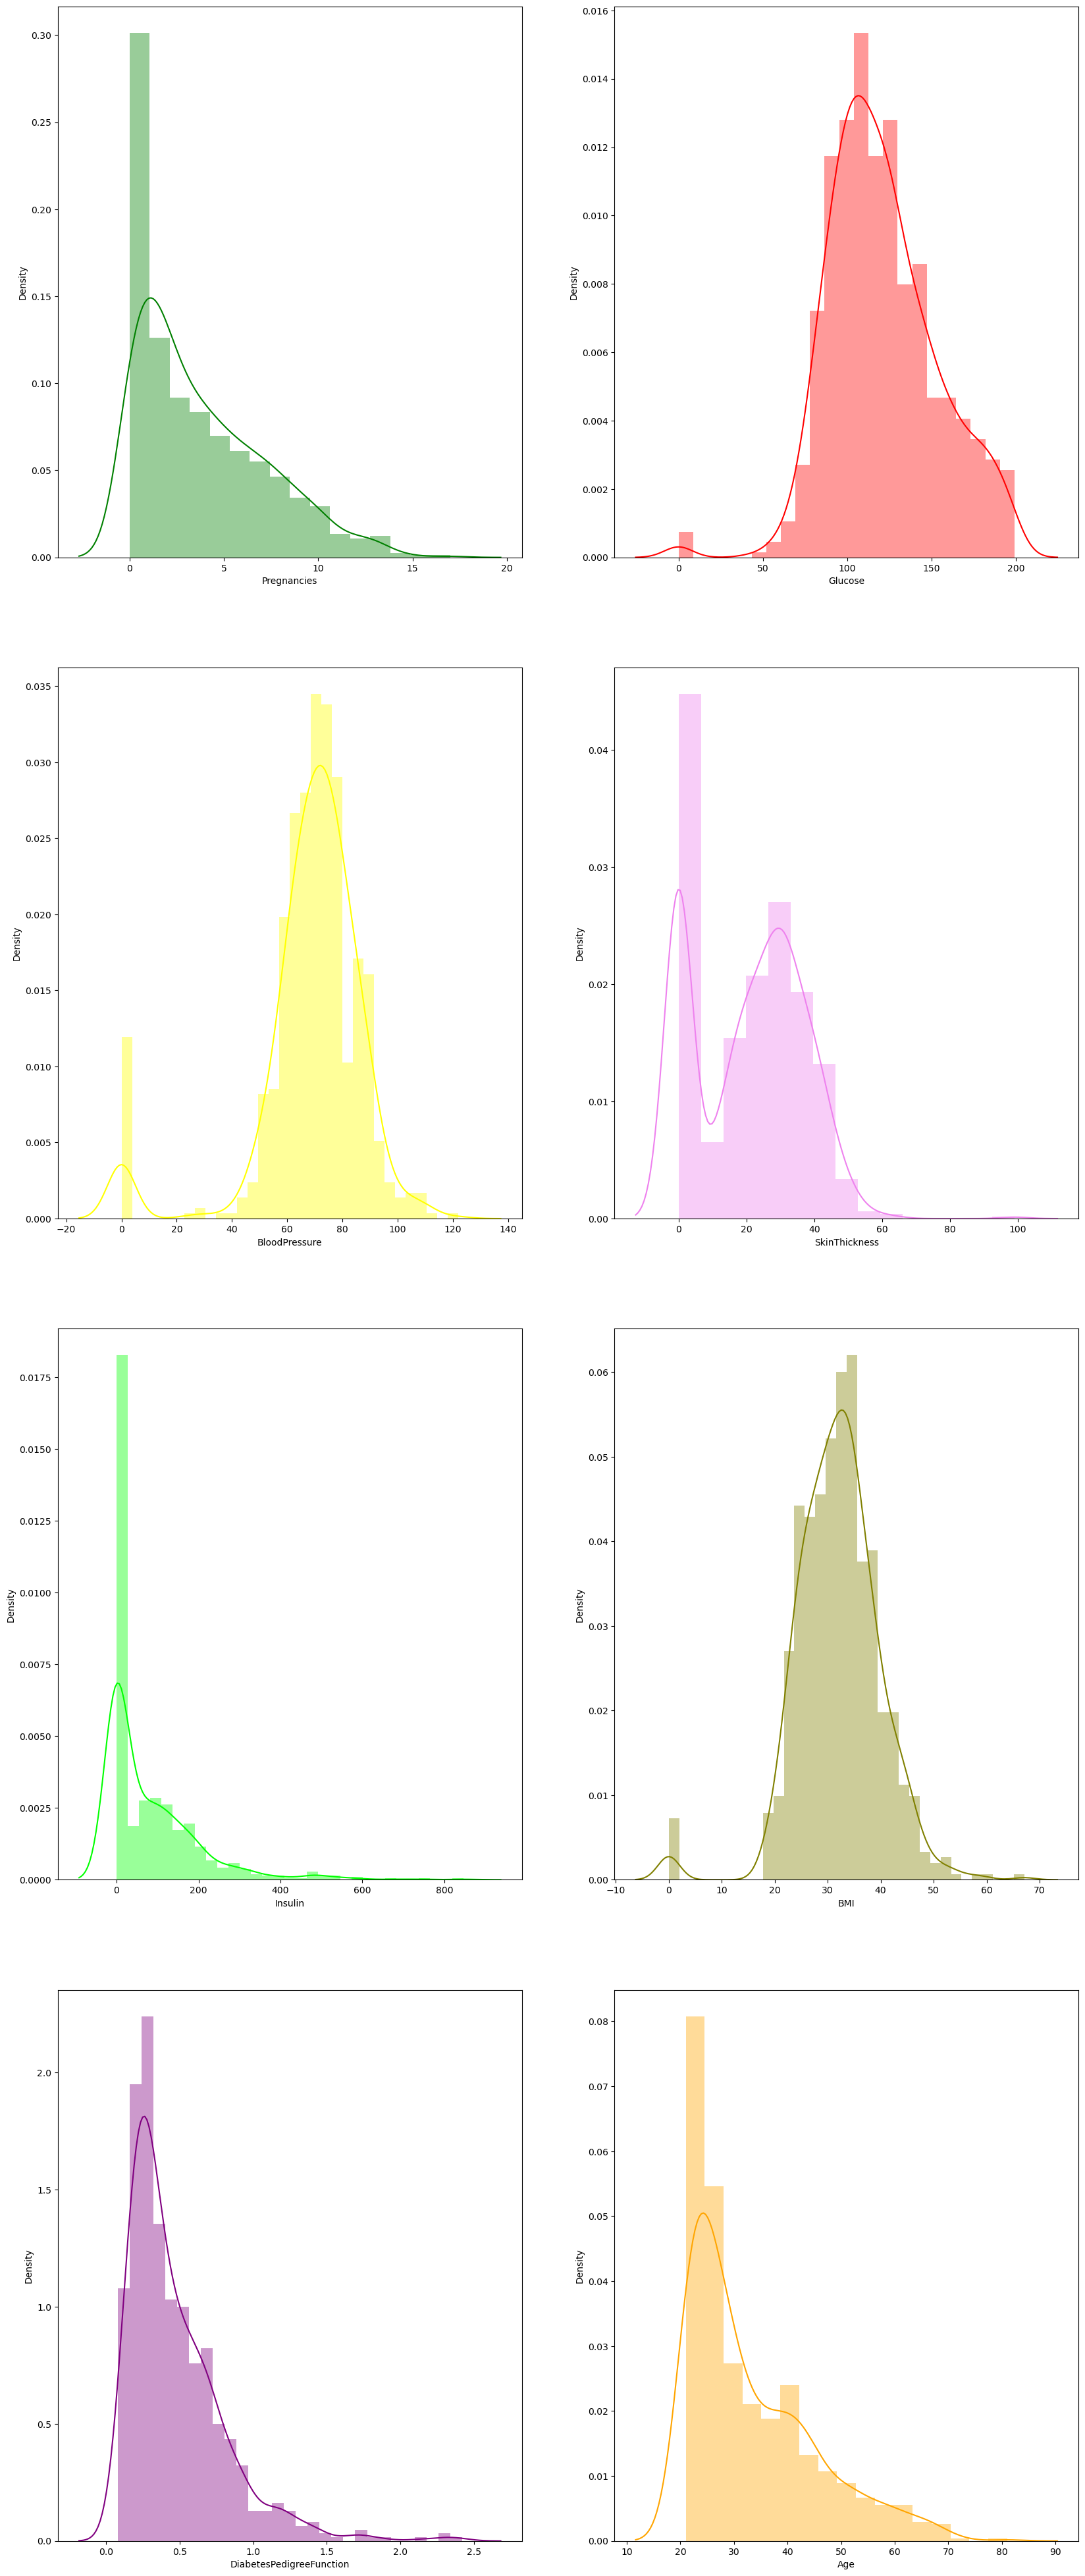

In [10]:
#Check the distribution are normal or skewed 
fig,axs = plt.subplots(4,2, figsize = (20,50))

sns.distplot(data.Pregnancies, ax=axs[0,0], color="green")
sns.distplot(data.Glucose, ax=axs[0,1], color="red")
sns.distplot(data.BloodPressure, ax=axs[1,0], color="yellow")
sns.distplot(data.SkinThickness, ax=axs[1,1], color="violet")
sns.distplot(data.Insulin, ax=axs[2,0],color="lime")
sns.distplot(data.BMI, ax=axs[2,1],color="olive")
sns.distplot(data.DiabetesPedigreeFunction, ax=axs[3,0],color="purple")
sns.distplot(data.Age, ax=axs[3,1], color="orange")

Conclusion :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<AxesSubplot:>

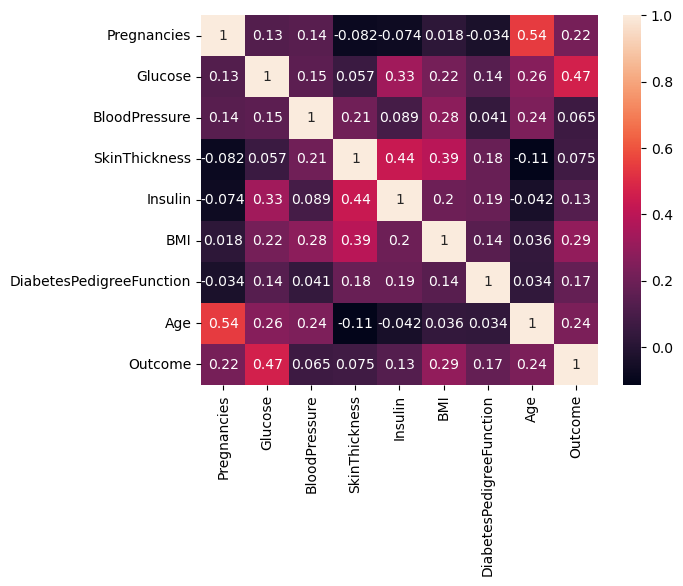

In [11]:
#Correlation between data
sns.heatmap(data.corr(), annot=True)

CONCLUSION :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated.

<AxesSubplot:xlabel='Age'>

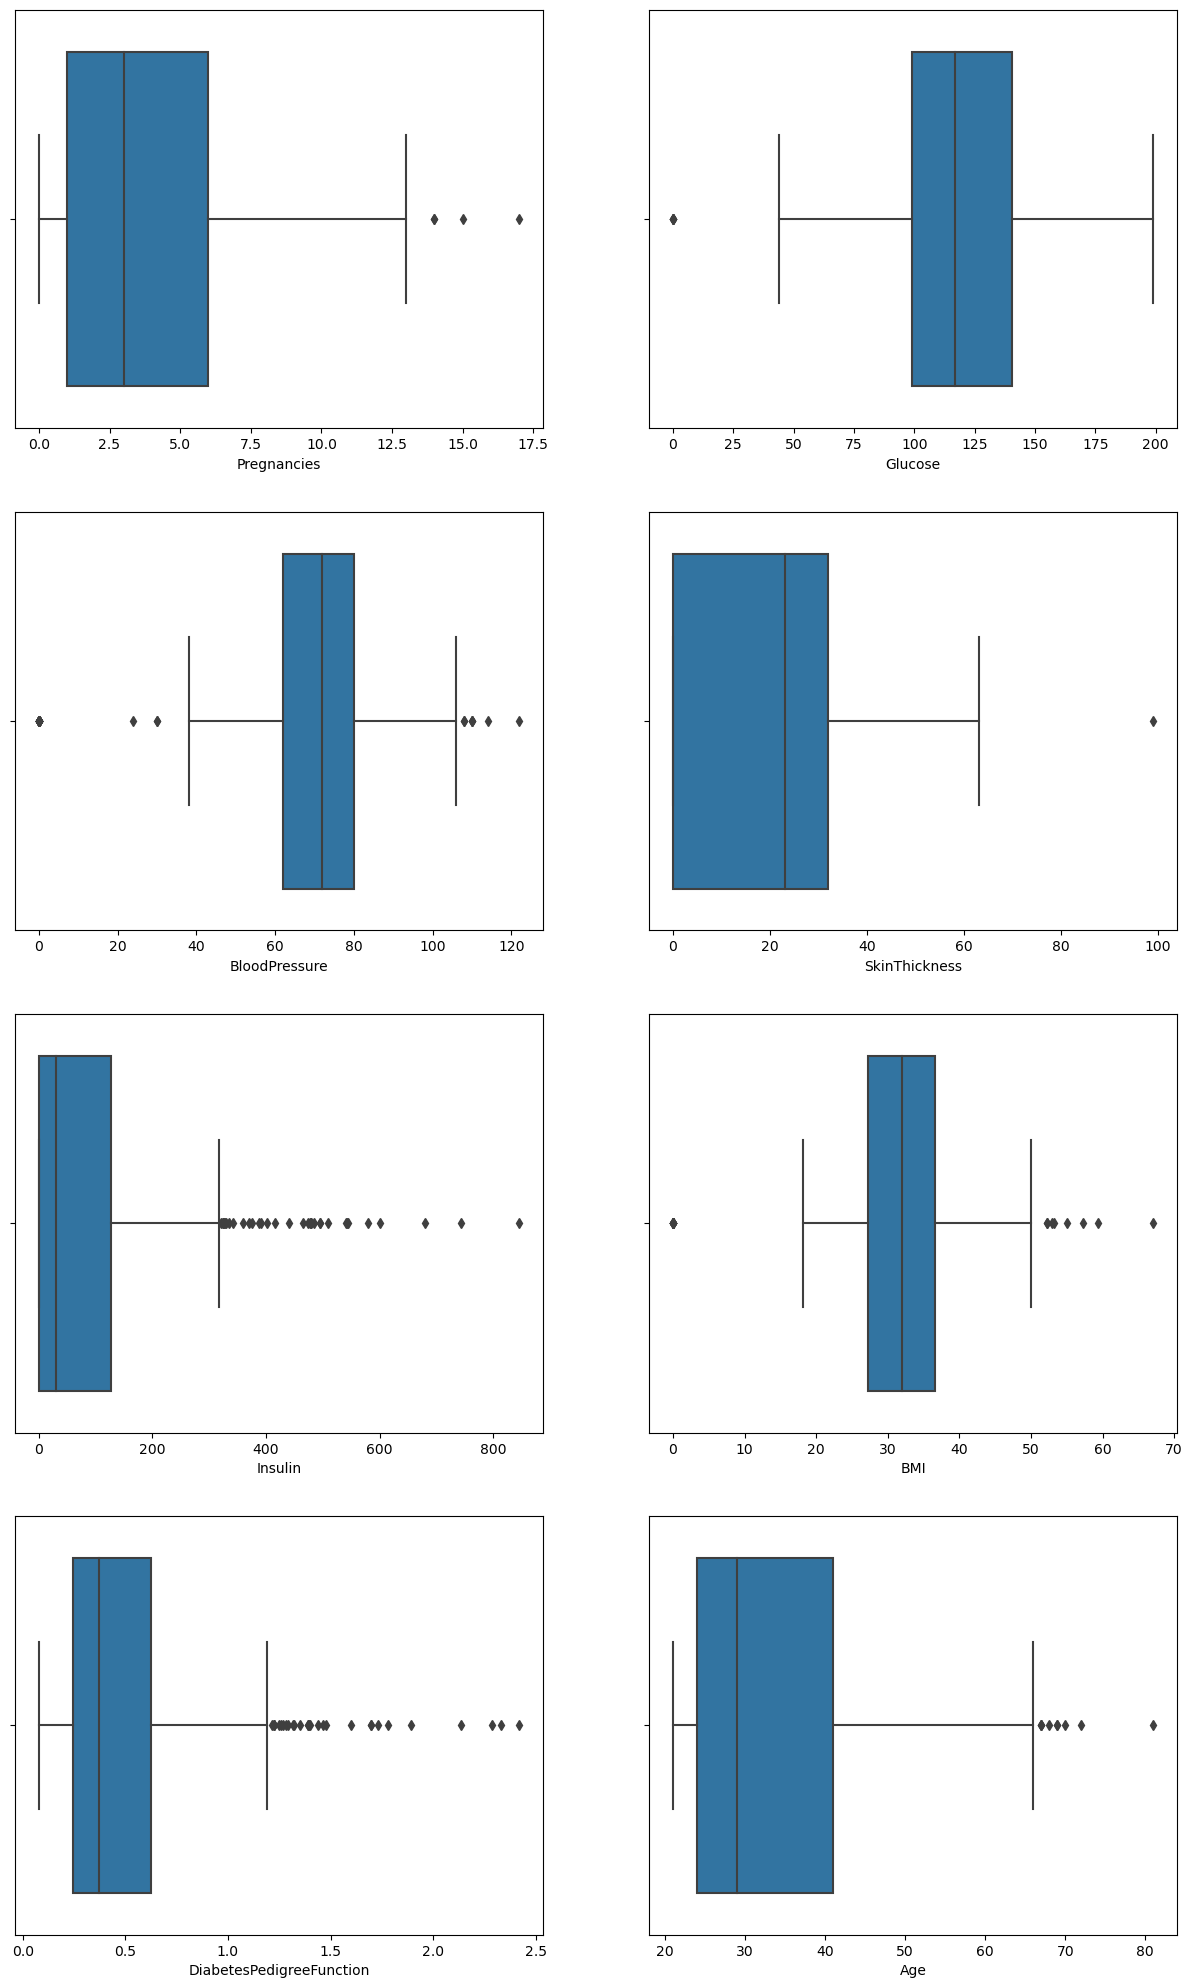

In [12]:
#Check the missing value of data
fig, axs = plt.subplots(4,2, figsize = (15,25))

sns.boxplot(x="Pregnancies", data = data, ax=axs[0,0])
sns.boxplot(x="Glucose", data = data, ax = axs[0,1])
sns.boxplot(x="BloodPressure", data = data,ax=axs[1,0])
sns.boxplot(x="SkinThickness", data = data, ax=axs[1,1])
sns.boxplot(x="Insulin", data = data, ax= axs[2,0])
sns.boxplot(x="BMI", data = data,ax=axs[2,1])
sns.boxplot(x="DiabetesPedigreeFunction", data = data, ax= axs[3,0])
sns.boxplot(x="Age", data = data, ax=axs[3,1])

# Handling Outliers

In [13]:
#scale down the data
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
new_data = scl.fit_transform(data)

In [14]:
new_data = pd.DataFrame(new_data)
new_data

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [15]:
#removing the outliers
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
df = qt.fit_transform(new_data)
df = pd.DataFrame(df)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258,1.0
...,...,...,...,...,...,...,...,...,...
763,0.940678,0.284224,0.649935,0.978488,0.853977,0.552803,0.110821,0.976532,0.0
764,0.387223,0.561930,0.451108,0.591917,0.000000,0.760756,0.456323,0.411995,0.0
765,0.677966,0.549544,0.516949,0.505867,0.711864,0.213168,0.254889,0.529335,0.0
766,0.232725,0.619948,0.181226,0.000000,0.000000,0.400261,0.473924,0.867014,1.0


<AxesSubplot:xlabel='Age'>

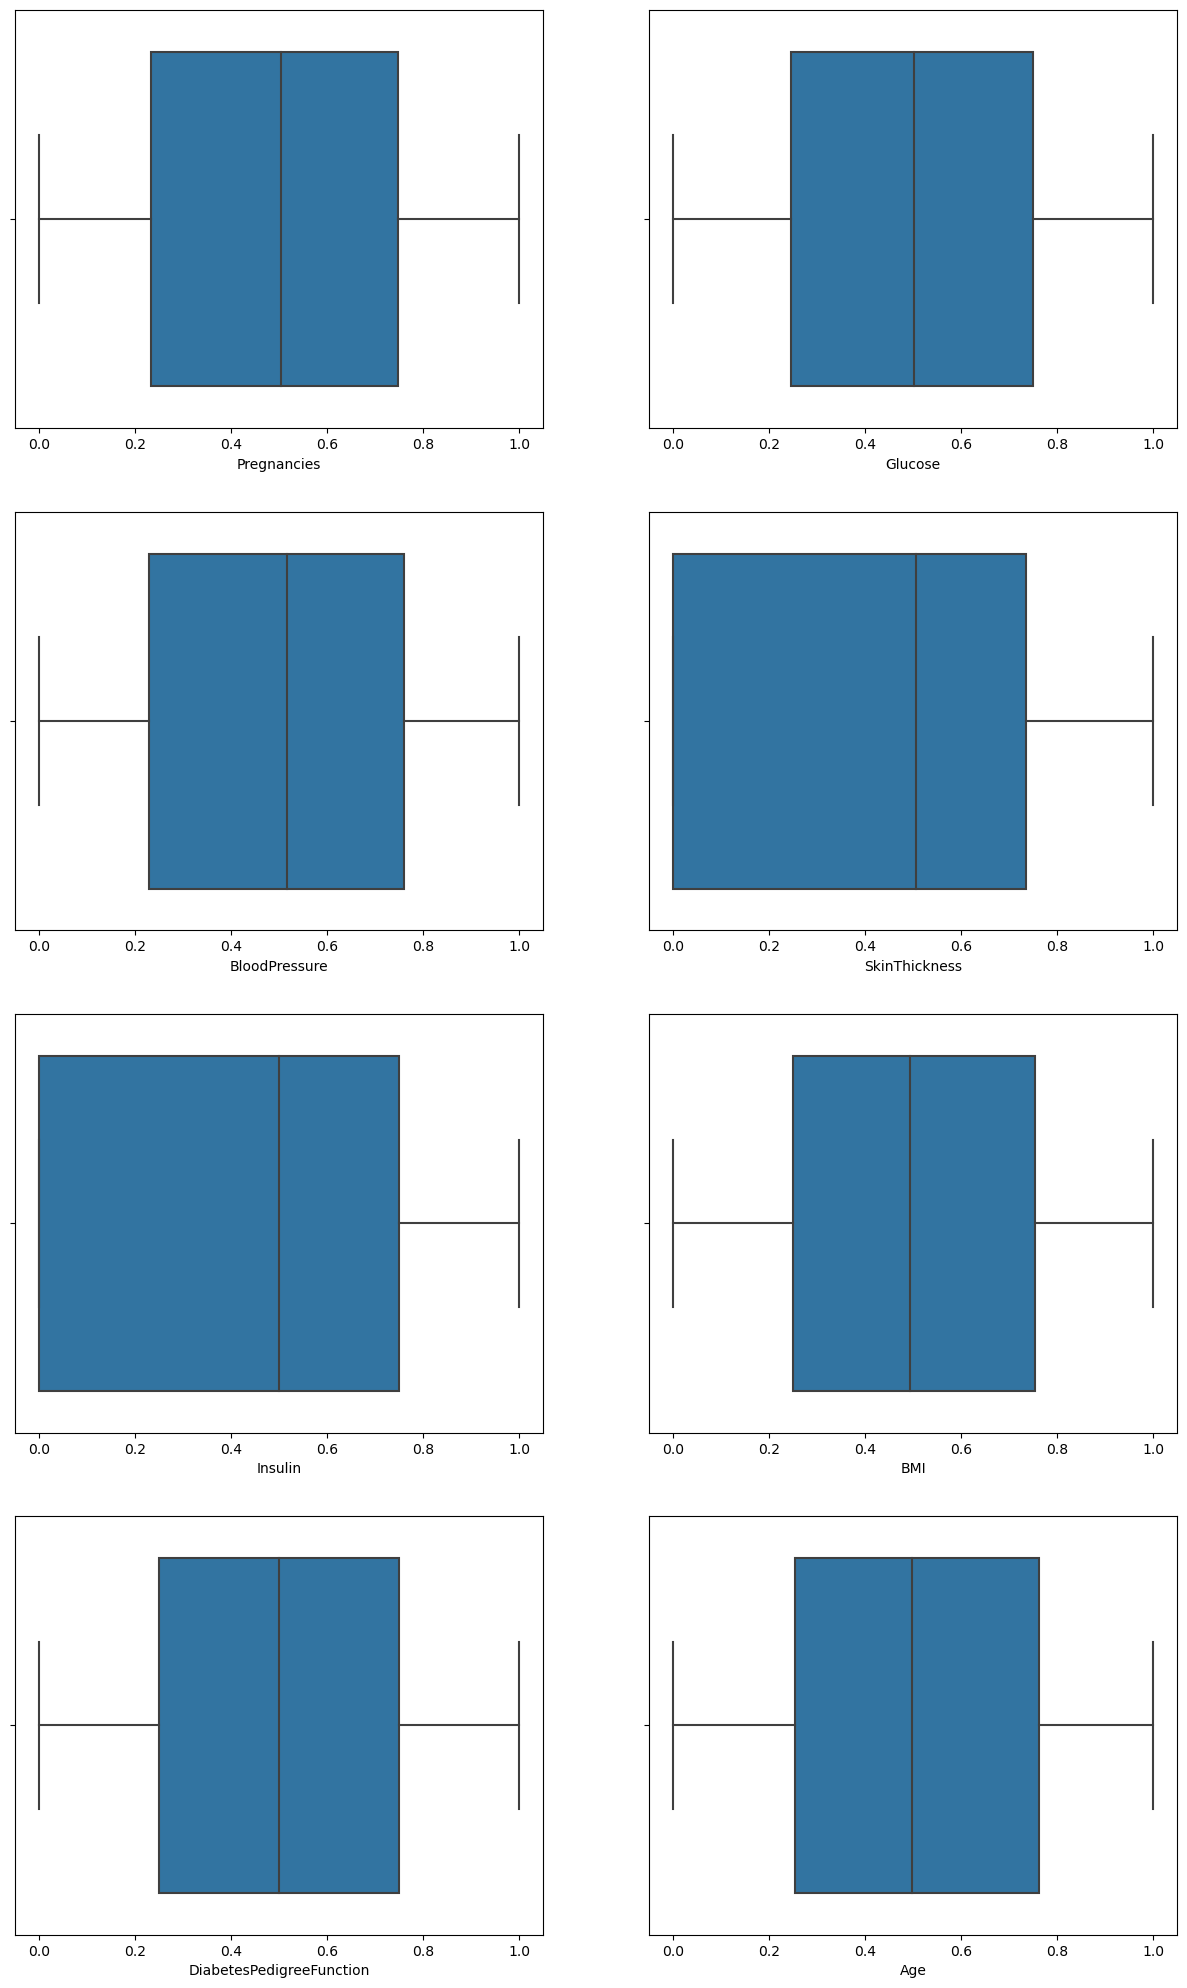

In [16]:
#check the outliers are removed or not
fig, axs = plt.subplots(4,2, figsize = (15,25))

sns.boxplot(x="Pregnancies", data = df, ax=axs[0,0])
sns.boxplot(x="Glucose", data = df, ax = axs[0,1])
sns.boxplot(x="BloodPressure", data = df,ax=axs[1,0])
sns.boxplot(x="SkinThickness", data = df, ax=axs[1,1])
sns.boxplot(x="Insulin", data = df, ax= axs[2,0])
sns.boxplot(x="BMI", data = df,ax=axs[2,1])
sns.boxplot(x="DiabetesPedigreeFunction", data = df, ax= axs[3,0])
sns.boxplot(x="Age", data = df, ax=axs[3,1])

<AxesSubplot:xlabel='Age', ylabel='Density'>

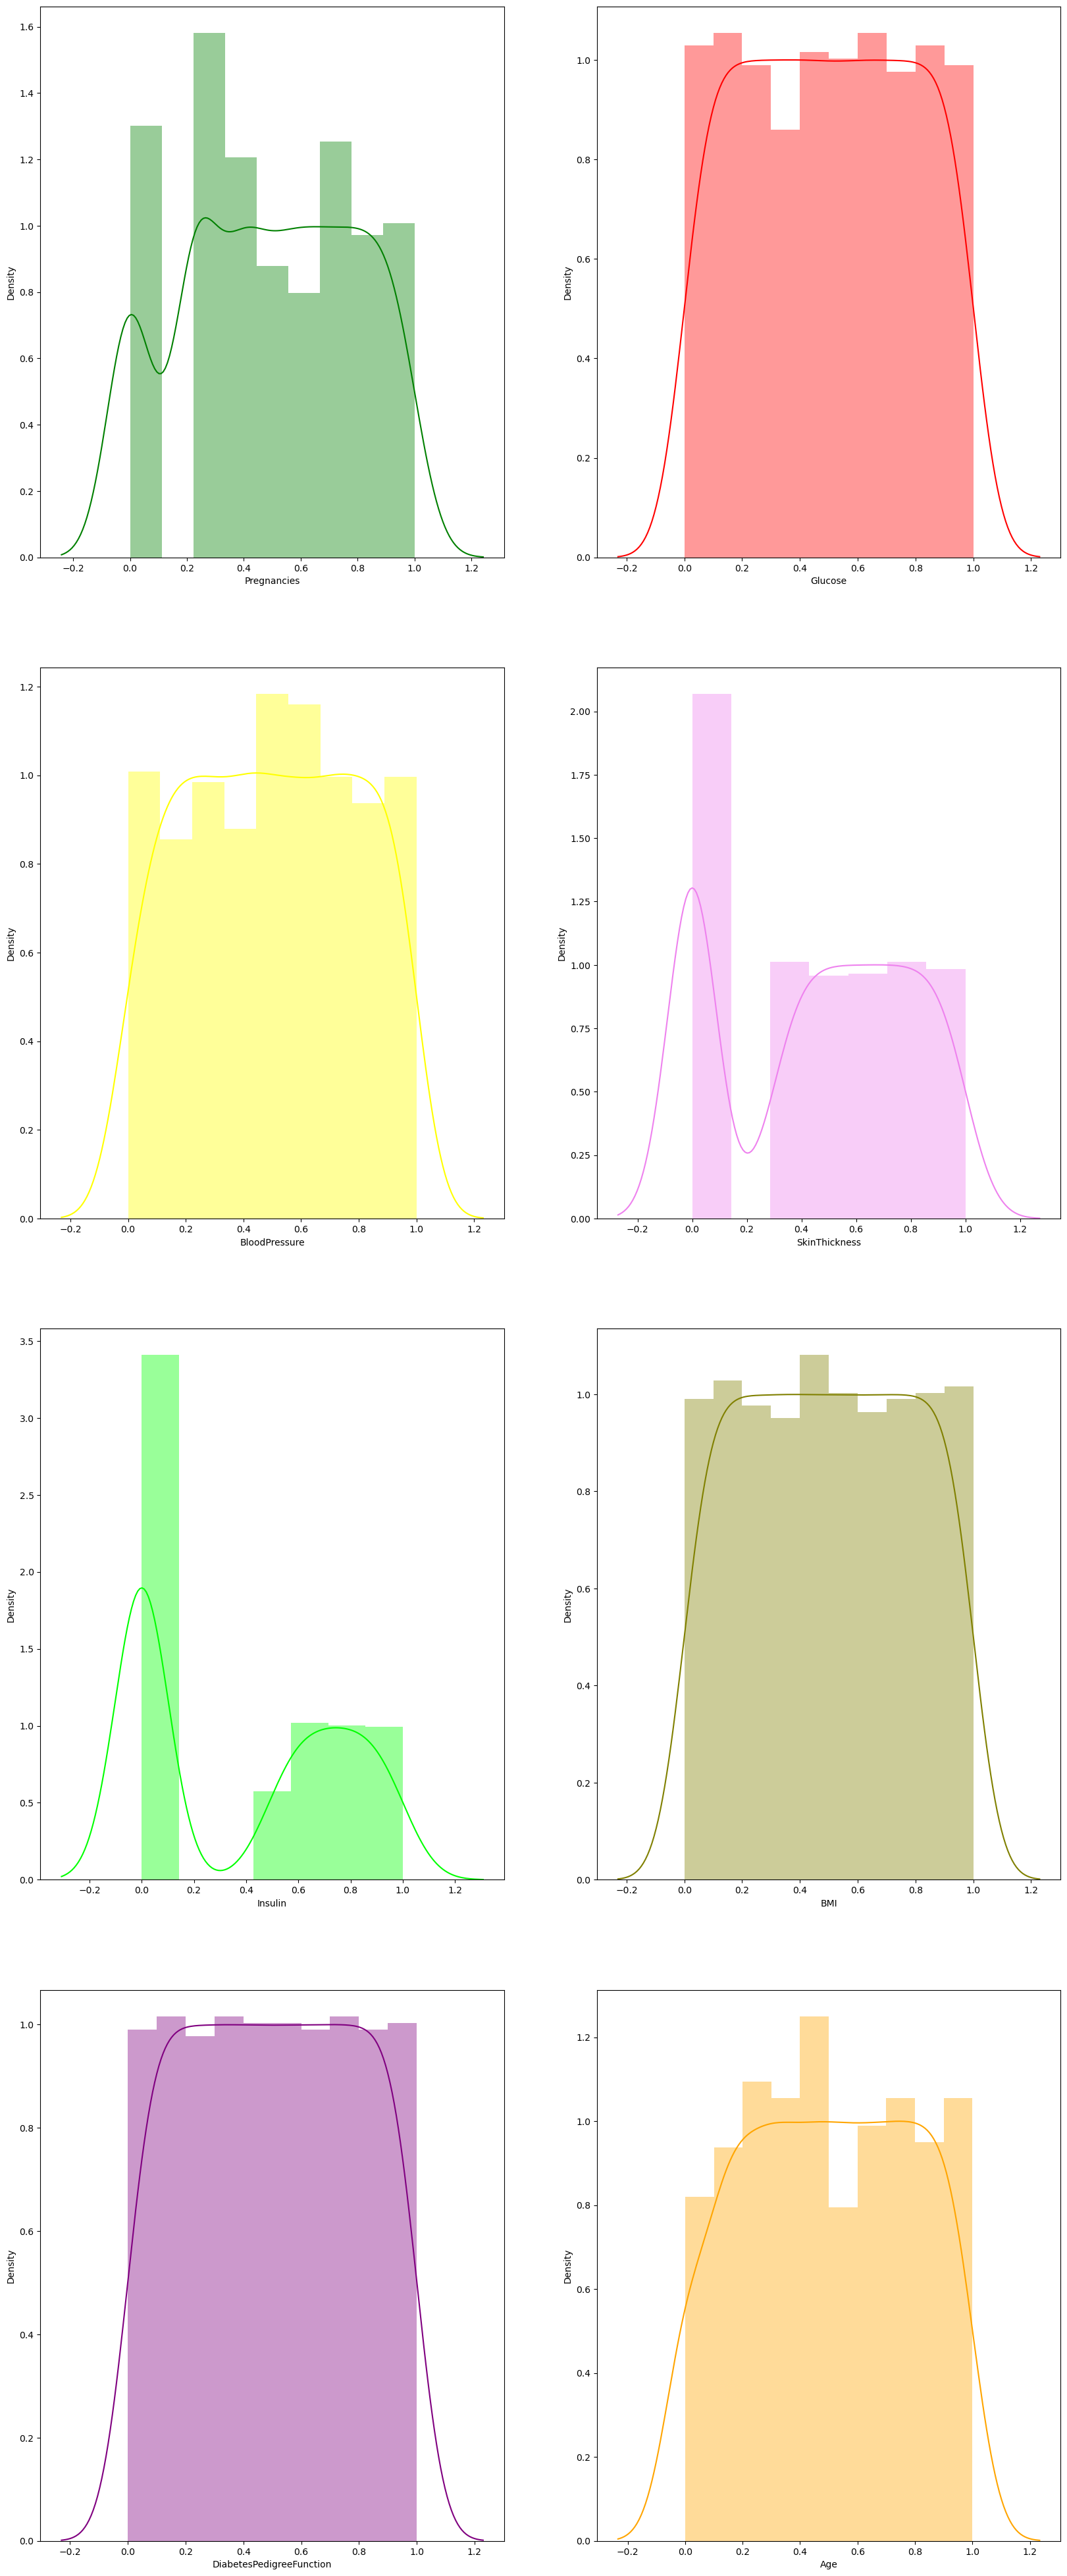

In [17]:
#histogram plot
fig,axs = plt.subplots(4,2, figsize = (20,50))

sns.distplot(df.Pregnancies, ax=axs[0,0], color="green")
sns.distplot(df.Glucose, ax=axs[0,1], color="red")
sns.distplot(df.BloodPressure, ax=axs[1,0], color="yellow")
sns.distplot(df.SkinThickness, ax=axs[1,1], color="violet")
sns.distplot(df.Insulin, ax=axs[2,0],color="lime")
sns.distplot(df.BMI, ax=axs[2,1],color="olive")
sns.distplot(df.DiabetesPedigreeFunction, ax=axs[3,0],color="purple")
sns.distplot(df.Age, ax=axs[3,1], color="orange")

In [18]:
df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

# Splitting the data into Features & Targets

In [19]:
x = df.drop(columns = "Outcome", axis = 1)
y = df.Outcome

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258
...,...,...,...,...,...,...,...,...
763,0.940678,0.284224,0.649935,0.978488,0.853977,0.552803,0.110821,0.976532
764,0.387223,0.561930,0.451108,0.591917,0.000000,0.760756,0.456323,0.411995
765,0.677966,0.549544,0.516949,0.505867,0.711864,0.213168,0.254889,0.529335
766,0.232725,0.619948,0.181226,0.000000,0.000000,0.400261,0.473924,0.867014


In [21]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [22]:
#Balance dataset
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler()
x_ref,y_ref = rs.fit_resample(x,y)

In [23]:
print(x_ref.shape,y_ref.shape)

(1000, 8) (1000,)


# Split the data into Training data & Testing Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_ref,y_ref, test_size=0.2)

In [26]:
print(x_train.shape,x_test.shape, y_test.shape, y_train.shape)

(800, 8) (200, 8) (200,) (800,)


# Hyperparameter Tunning

In [27]:
model_selection = {
    "Logistic Regression" :{
        "model": LogisticRegression(),
        "parameters": {
            "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'svm' : {
        'model' : svm.SVC(),
        'parameters' : {
            'kernel' : ['rbf','linear'],
            'C' : [10,15,20]
        }
    },
    "Decision Tree" : {
        'model': DecisionTreeClassifier(),
        "parameters" : {
            "criterion" : ['gini','entropy'],
            "max_depth" : [1,5,10,50,100,500,1000,1500],
            "max_leaf_nodes" : [1,5,10,15]
        }
    },
    "Random Forest" : {
        "model" : RandomForestClassifier(),
        "parameters" : {
            "criterion" : ['gini','entropy'],
            "n_estimators" : [50,100,150,200]
        }
    },
    "KNN" : {
        "model" : KNeighborsClassifier(),
        "parameters" : {
            'n_neighbors' : [3,5,7,8,10]
        }
    },
    'naive_bayes_gaussian' : {
        'model' : GaussianNB(),
        'parameters' : {}
    }
}

# Model Train

In [28]:
score = []

for model_name, mp in model_selection.items():
    clf = GridSearchCV(mp['model'], mp['parameters'], cv=10)
    clf.fit(x_train,y_train)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
diab_df = pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])
diab_df

,model,best_score,best_params
0,Logistic Regression,0.76000,{'solver': 'newton-cg'}
1,svm,0.77625,"{'C': 15, 'kernel': 'rbf'}"
2,Decision Tree,0.77125,"{'criterion': 'entropy', 'max_depth': 10, 'max..."
3,Random Forest,0.84750,"{'criterion': 'gini', 'n_estimators': 100}"
4,KNN,0.77250,{'n_neighbors': 8}
5,naive_bayes_gaussian,0.75750,{}


# Observations:

1) Accuracy are increased by doing the imbalanced data to balanced data.

2) Random Forest has 85.2% more accurate the Support vectore machine of 80.3% and Logistic regression of 77.1% and Decision tree of 77.1% and gaussion naive_bayes of 75.1% and KNN of 77.1%. 

3) So overall Random Forest has the highest score 85.2% among all models. And its best parameter is- {'criterion': 'gini', 'n_estimators': 200}.